In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import multiprocessing

home = "../../"

n_cores = multiprocessing.cpu_count() - 2
fig_width_pt = 222.62206                # Get this from LaTeX using \the\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [15]:
names = ['ID', 'Xcor','Ycor', 'F606','eF606','F814','eF814','chi','sharp']
df_stars = pd.read_csv(home + 'Data/hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt', 
                      names=names, delim_whitespace=True, skiprows=1)

df_stars['Color'] = df_stars.F606 - df_stars.F814

x = df_stars['Color'].to_numpy()
y = 16.5 + 4. * x

df_stars.loc[df_stars.F814 >= y, 'Label'] = 1
df_stars.loc[df_stars.F814 < y, 'Label'] = 0

df_stars.head()

,ID,Xcor,Ycor,F606,eF606,F814,eF814,chi,sharp,Color,Label
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310,1.070,1.0
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000,1.028,0.0
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940,0.946,1.0
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585,1.923,1.0
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720,-0.006,1.0


# Visualize Data

(33.0, 12.0)

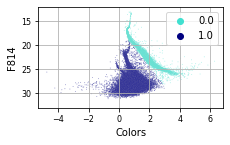

In [16]:
plt.figure(constrained_layout=True)

colors = ['turquoise', 'navy']
sns.scatterplot(x=df_stars.Color, y=df_stars.F814, hue=df_stars.Label.values, palette=colors, s=0.8, alpha=0.5)
plt.xlabel('Colors')
plt.ylabel('F814')
plt.grid()
#plt.xlim(33, 13)
plt.ylim(33, 12)
#plt.savefig('../Results/Images/real_clusters.png', dpi=2000, transparent=False)

# Splitting the dataset into train and test samples 

In [17]:
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
scaler.fit(X=df_stars.iloc[:, :-2].to_numpy())
x_preprocessed = scaler.transform(df_stars.iloc[:, :-2].to_numpy())

x_preprocessed_3f = df_stars.iloc[:, 2:-2].to_numpy()
x_preprocessed_2f = df_stars.loc[:, ['F606', 'F814']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, df_stars.Label.to_numpy())

## K-Means

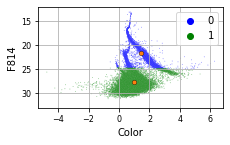

In [18]:
plt.figure(constrained_layout=True)
kmeans = KMeans(n_clusters=2).fit(df_stars[['Color', 'F814']].values)
colors = ['blue', 'green']
sns.scatterplot(x=df_stars.Color, y=df_stars.F814, hue=kmeans.labels_, palette=colors, s=0.8, alpha=0.5)
plt.ylim(33, 12)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], palette='red', ec='black', legend=False, s=20)
plt.grid()
#plt.savefig('../Results/Images/k-means.png', dpi=2000, transparent=False)

In [19]:
kmeans.labels_

df_stars['K_Label'] = kmeans.labels_

for i in range(2):
     mask = df_stars.Label == i
     p = (df_stars.loc[mask, 'Label'].to_numpy() == 
          df_stars.loc[mask, 'K_Label'].to_numpy()).mean()
     print(p)

0.9633237081411886
0.9051879619478729


<AxesSubplot:xlabel='F606', ylabel='F814'>

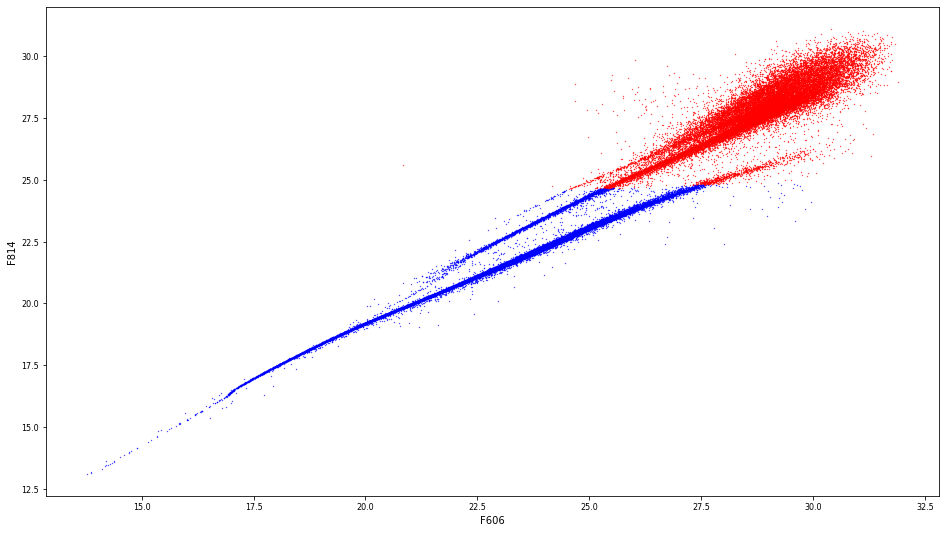

In [20]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

df_stars.loc[df_stars.K_Label == 1].plot(x="F606", y="F814", kind="scatter", s=0.1, ax=ax, c='r')
df_stars.loc[df_stars.K_Label == 0].plot(x="F606", y="F814", kind="scatter", s=0.1, ax=ax, c='b')

(33.0, 12.0)

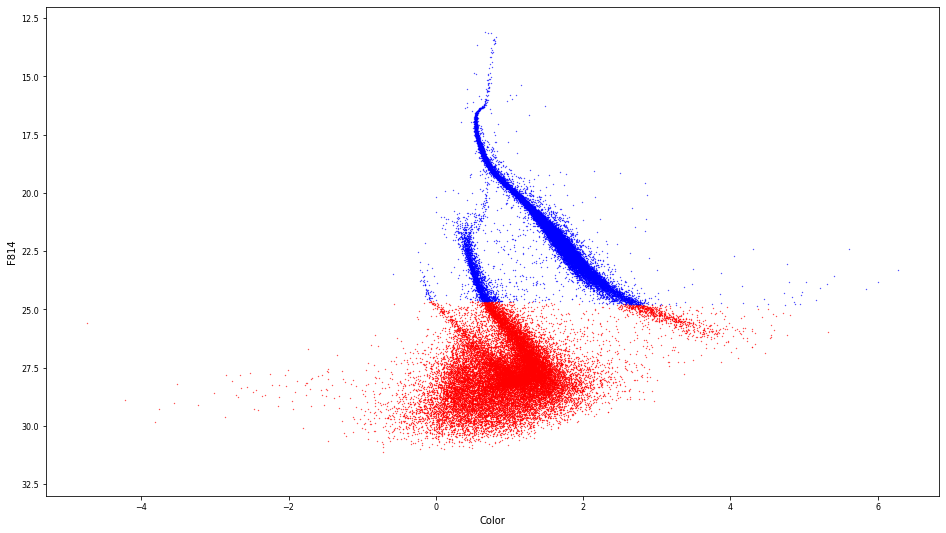

In [21]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

df_stars.loc[df_stars.K_Label == 1].plot(x="Color", y="F814", kind="scatter", s=0.1, ax=ax, c='r')
df_stars.loc[df_stars.K_Label == 0].plot(x="Color", y="F814", kind="scatter", s=0.1, ax=ax, c='b')
plt.ylim(33, 12)

(33.0, 12.0)

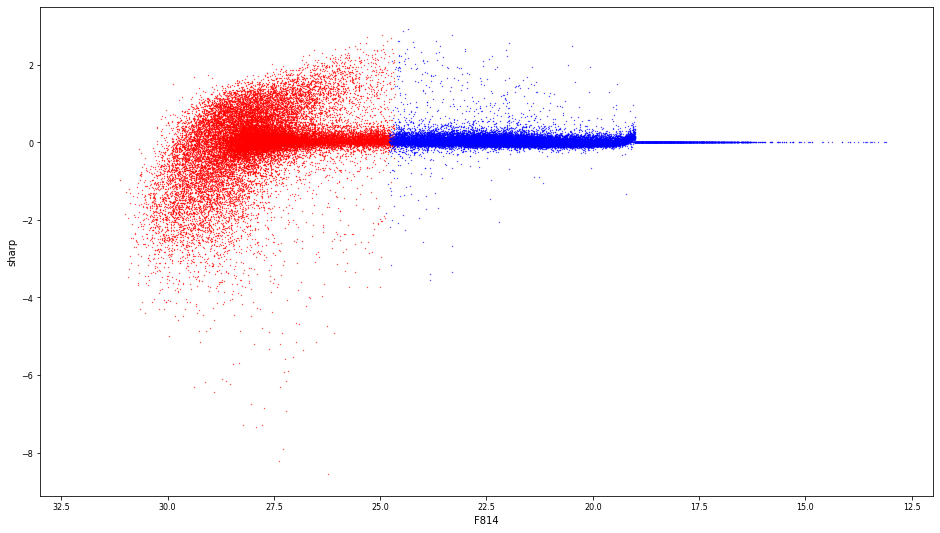

In [22]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

df_stars.loc[df_stars.K_Label == 1].plot(x="F814", y="sharp", kind="scatter", s=0.1, ax=ax, c='r')
df_stars.loc[df_stars.K_Label == 0].plot(x="F814", y="sharp", kind="scatter", s=0.1, ax=ax, c='b')
plt.xlim(33, 12)

<AxesSubplot:xlabel='F606', ylabel='F814'>

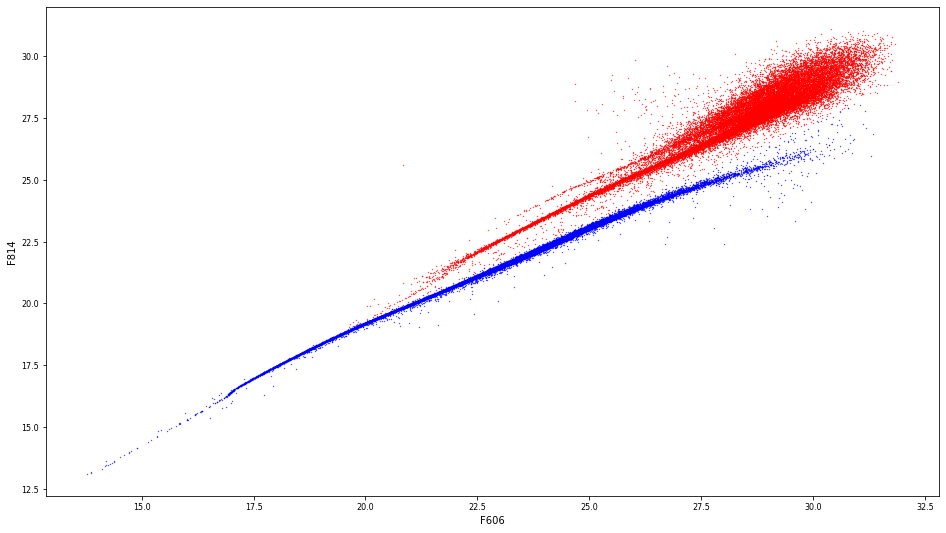

In [23]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

df_stars.loc[df_stars.Label == 1].plot(x="F606", y="F814", kind="scatter", s=0.1, ax=ax, c='r')
df_stars.loc[df_stars.Label == 0].plot(x="F606", y="F814", kind="scatter", s=0.1, ax=ax, c='b')

## Gaussian Mixture

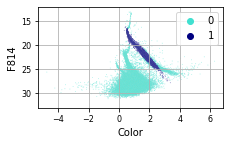

In [24]:
from sklearn.mixture import GaussianMixture

colors = ['turquoise', 'navy']

n_classes = len(np.unique(y_train))

model_GM = GaussianMixture(n_components=n_classes,
                           covariance_type='full', max_iter=100)

'''model_GM.means_init = np.array([x_preprocessed_2f[df_stars.Label.values == i].mean(axis=0)
                                    for i in range(n_classes)])'''

model_GM.fit(x_preprocessed_2f)
y_pred = model_GM.predict(x_preprocessed_2f)

plt.figure(constrained_layout=True)

sns.scatterplot(x=df_stars.Color, y=df_stars.F814, hue=y_pred, palette=colors, s=0.8, alpha=0.5)
#sns.scatterplot(x=model_GM.means_[:, 0], y=model_GM.means_[:, 1], palette='red', ec='black', legend=False, s=20)

plt.grid()
plt.ylim(33, 12)
plt.xlabel('Color')
plt.ylabel('F814')
plt.legend()
#plt.savefig('../Results/Images/GMM_2_features.png', dpi=2000, transparent=False)

In [25]:
df_stars['G_Label'] = y_pred

<AxesSubplot:xlabel='F606', ylabel='F814'>

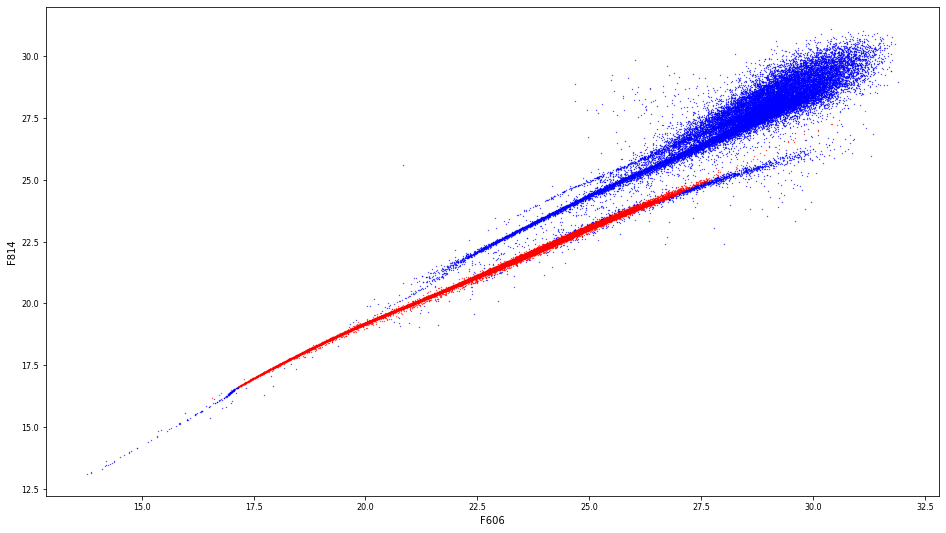

In [26]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

df_stars.loc[df_stars.G_Label == 1].plot(x="F606", y="F814", kind="scatter", s=0.1, ax=ax, c='r')
df_stars.loc[df_stars.G_Label == 0].plot(x="F606", y="F814", kind="scatter", s=0.1, ax=ax, c='b')

(33.0, 12.0)

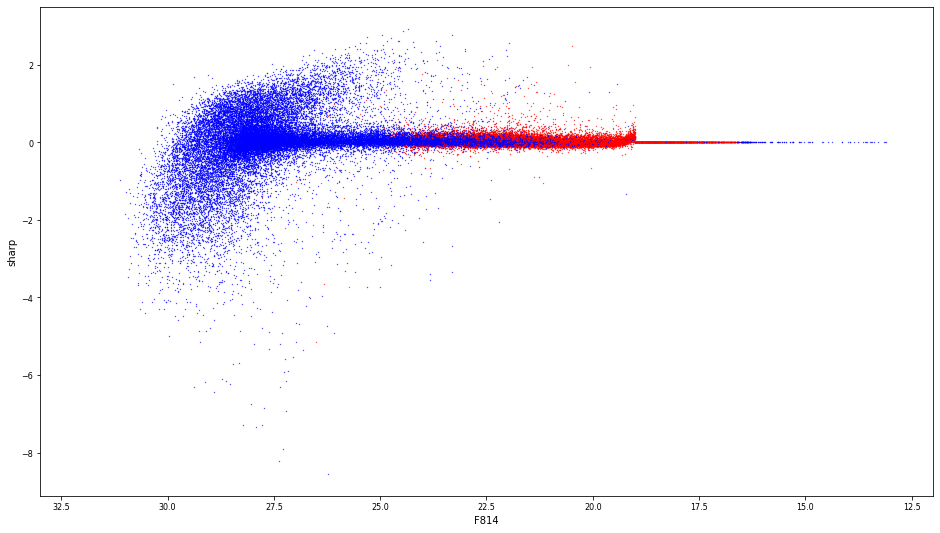

In [27]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

df_stars.loc[df_stars.G_Label == 1].plot(x="F814", y="sharp", kind="scatter", s=0.1, ax=ax, c='r')
df_stars.loc[df_stars.G_Label == 0].plot(x="F814", y="sharp", kind="scatter", s=0.1, ax=ax, c='b')
plt.xlim(33, 12)

In [17]:
G_Labels = np.logical_not(y_pred)

for i in range(2):
    c = df_stars.Label == i
    p = (df_stars.loc[c, 'Label'].to_numpy() == 
          y_pred[c]).mean()
    print(p)

0.05895789337585657
0.0006365597482052551


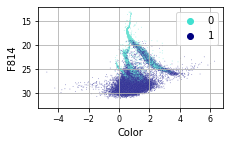

In [12]:
from sklearn.mixture import GaussianMixture

colors = ['turquoise', 'navy']

n_classes = len(np.unique(y_train))

model_GM = GaussianMixture(n_components=n_classes,
                           covariance_type='full', max_iter=100)

'''model_GM.means_init = np.array([x_preprocessed_3f[df_stars.Label.values == i].mean(axis=0)
                                    for i in range(n_classes)])'''

model_GM.fit(x_preprocessed_3f)
y_pred = model_GM.predict(x_preprocessed_3f)

plt.figure(constrained_layout=True)

sns.scatterplot(x=df_stars.Color, y=df_stars.F814, hue=y_pred, palette=colors, s=0.8, alpha=0.5)
#sns.scatterplot(x=model_GM.means_[:, 0], y=model_GM.means_[:, 1], palette='red', ec='black', legend=False, s=20)

plt.grid()
plt.ylim(33, 12)
plt.xlabel('Color')
plt.ylabel('F814')
plt.legend()
#plt.savefig('../Results/Images/GMM_3_features.png', dpi=2000, transparent=False)

In [14]:
G_Labels = np.logical_not(y_pred)

for i in range(2):
    c = df_stars.Label == i
    p = (df_stars.loc[c, 'Label'].to_numpy() == 
          y_pred[c]).mean()
    print(p)

0.8827306813774081
0.6560455493864271
